# Curve Fitting

*submitted by:*

Aquiro, Freddielyn E.

Canoza, Cherrylyn

Joaquin, Christopher Marc 


In [ ]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
# Data Preparation
# importing data set from sklearn diabetes
db_data = datasets.load_diabetes()

In [ ]:
diabetes_data = pd.DataFrame(db_data.data, columns=db_data.feature_names)
diabetes_data.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


In [ ]:
# checking its rows and columns 
diabetes_data.shape

(442, 10)

In [ ]:
# target refers to y-axis. setting target as the data of disease progression
diabetes_data['disease progression'] = db_data.target
diabetes_data['disease progression'].head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: disease progression, dtype: float64

In [ ]:
#cheking the updated rows and columns of the data
diabetes_data.shape

(442, 11)

Visualization of percentage related on the following 
 bp =  average blood pressure 

 s4= total cholesterol / HDL (tch)
 
 s6 = blood sugar level 

which measure of disease progression one year after baseline [1] 

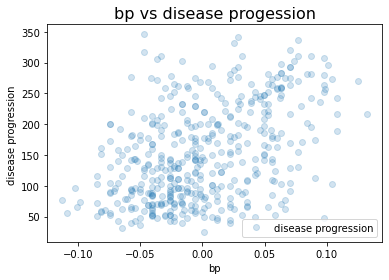

In [ ]:
# Visualizing the average blood pressure and disease progression
diabetes_data.plot(x='bp', y='disease progression', style='o', alpha=0.2)  
plt.title('bp vs disease progession', fontsize=16)  
plt.xlabel('bp')  
plt.ylabel('disease progression ')  
plt.show()

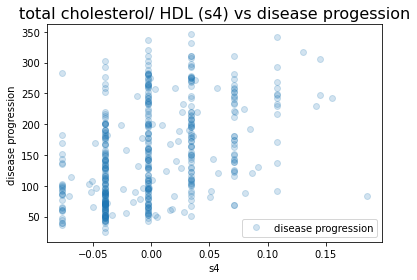

In [ ]:
diabetes_data.plot(x='s4', y='disease progression', style='o', alpha=0.2)  
plt.title('total cholesterol/ HDL (s4) vs disease progession', fontsize=16)  
plt.xlabel('s4')  
plt.ylabel('disease progression ')  
plt.show()

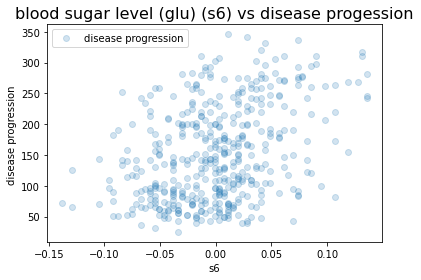

In [ ]:
diabetes_data.plot(x='s6', y='disease progression', style='o', alpha=0.2)  
plt.title('blood sugar level (glu) (s6) vs disease progession', fontsize=16)  
plt.xlabel('s6')  
plt.ylabel('disease progression ')  
plt.show()

## Multiple Linear Regression

In [ ]:
# Multiple Regreesion
X = pd.DataFrame(np.c_[diabetes_data['s4'], diabetes_data['bp'], diabetes_data['s6']], columns=['s4','bp','s6'])
y = diabetes_data['disease progression']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

In [ ]:
# Fitting a Multiple Linear Model
l_reg= LinearRegression()  
l_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Summary of modelling 
l_reg_sum =  pd.DataFrame(X.columns, columns=['Features'])
l_reg_sum['Weights Raw'] = l_reg.coef_.reshape(3,1)
l_reg_sum = l_reg_sum.append({'Features':'Intercept', 'Weights Raw':float(l_reg.intercept_)}, ignore_index=True)
l_reg_sum

,Features,Weights Raw
0,s4,476.371697
1,bp,520.717573
2,s6,223.540217
3,Intercept,152.003079


In [ ]:
# prediction model 
preds = l_reg.predict(X_test)
res = pd.DataFrame({'Actual': y_test, 'Predicted': preds})
res

,Actual,Predicted
246,78.0,101.813989
425,152.0,61.865283
293,200.0,158.542200
31,59.0,63.717138
359,311.0,198.762461
...,...,...
277,64.0,119.706441
132,107.0,151.337305
213,49.0,122.883893
286,60.0,73.843248


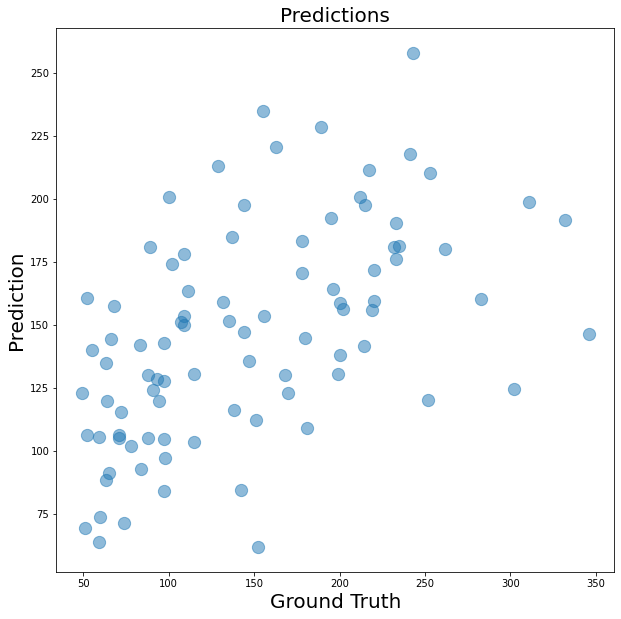

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Predictions', fontsize=20)
plt.scatter(y_test, preds, s = 150,  alpha=0.5)
plt.xlabel('Ground Truth', fontsize=20)
plt.ylabel('Prediction', fontsize=20)
plt.show()

In [ ]:
# Metrics
# adjusted r squared as per lecture

def adjr2(r2,x):
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [ ]:
MSE = metrics.mean_squared_error(y_test, preds)
RMSE = np.sqrt(MSE)
R2 = metrics.r2_score(y_test, preds)
AR2 = adjr2(R2,X_train)
model_metrics = pd.DataFrame([['MSE'],['RMSE'],['R^2'],
                              ['Adjusted R^2']], 
                             columns=['Metrics'])
model_metrics['Multiple Regression'] = MSE, RMSE, R2, AR2
model_metrics

,Metrics,Multiple Regression
0,MSE,3834.449487
1,RMSE,61.922932
2,R^2,0.280452
3,Adjusted R^2,0.274267


## Polynomial Regression

In [ ]:
# POLYNOMIAL REGRESSION
from sklearn.preprocessing import PolynomialFeatures
X = pd.DataFrame(np.c_[diabetes_data['s4'], diabetes_data['bp'], diabetes_data['s6'],diabetes_data['s1']], columns=['s4','bp','s6','s1'])
y = diabetes_data['disease progression']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

In [ ]:
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X_train)

In [ ]:
print(X_poly)

[[ 1.00000000e+00  3.43088589e-02 -6.76422830e-02 ...  1.97895780e-03
   2.19497116e-03  2.43456348e-03]
 [ 1.00000000e+00  5.60805202e-02 -1.14087284e-02 ...  1.02778960e-03
   1.27305716e-03  1.57685439e-03]
 [ 1.00000000e+00 -2.59226200e-03  4.25295792e-02 ...  2.72463581e-05
  -3.72467191e-04  5.09175604e-03]
 ...
 [ 1.00000000e+00 -3.94933829e-02 -2.28849640e-02 ...  1.17063562e-03
   2.17217379e-03  4.03057866e-03]
 [ 1.00000000e+00  1.29062088e-02  5.85963092e-02 ...  2.36464207e-03
  -2.88648387e-03  3.52348849e-03]
 [ 1.00000000e+00 -3.94933829e-02 -5.73136710e-02 ...  2.72463581e-05
   1.30287145e-04  6.23009508e-04]]


In [ ]:
# Fitting a Multiple Linear Model
l_reg2 = LinearRegression()
l_reg2.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
preds = l_reg2.predict(poly_reg.fit_transform(X_test))

In [ ]:
poly_MSE = metrics.mean_squared_error(y_test,preds)
poly_RMSE = np.sqrt(poly_MSE)
poly_R2 = metrics.r2_score(y_test,preds)
poly_AR2 = adjr2(poly_R2,X_train)
model_metrics = pd.DataFrame([['MSE'],['RMSE'],['R^2'],
                              ['Adjusted R^2']], 
                             columns=['Metrics'])
model_metrics['Polynomial Regression'] = poly_MSE, poly_RMSE, poly_R2, poly_AR2
model_metrics

,Metrics,Polynomial Regression
0,MSE,4219.197941
1,RMSE,64.955353
2,R^2,0.208253
3,Adjusted R^2,0.199152


## Normal Equation 

In [ ]:
X = diabetes_data['s4'].values.reshape(-1,1)
y = diabetes_data['disease progression'].values.reshape(-1,1)

n = len(diabetes_data['s4']) #no. rows
bias = np.ones((n,1)) #column-1 of Matrix X
xnew = np.reshape(X,(n,1)) #reshaping the data
xnew1 =np.append(bias,xnew,axis=1) #forming Matrix X
xnew1_t = np.transpose(xnew1) #transpose
xnew_t_dot_x_new = xnew1_t.dot(xnew1) #matrix multiplication
temp_1 = np.linalg.inv(xnew_t_dot_x_new) #inverse of a matrix
temp_2 = xnew1_t.dot(y)

In [ ]:
#Finding coefficients:

theta = temp_1.dot(temp_2)
Intercept = theta[0]
Slope = theta[1]
print("Intercept:",Intercept)
print("Slope:",Slope)

Intercept: [152.13348416]
Slope: [696.88303009]


In [ ]:
#Predicting values:
def predict_value(input_feature,slope,intercept):
    return slope*input_feature+intercept

In [ ]:
bmi =3
prediction =predict_value(bmi,Slope,Intercept)
print(prediction)

[2242.78257444]


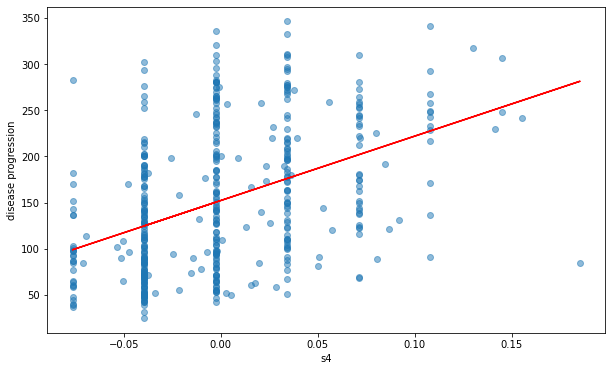

In [ ]:
#Plotting the regression Line:
plt.figure(figsize=(5*2,3*2))
plt.scatter(X,y, alpha=0.5)
plt.xlabel('s4')
plt.ylabel('disease progression')
plt.plot(X,Slope*X+Intercept, color="red")

##Polynomial Curve

In [ ]:
def linear_regressor(X,y):
  X = np.array(X)
  y = np.array(y)
  n = X.size
  w0 = (y.mean()*np.sum(X**2)-X.mean()*np.sum(X*y)) / (np.sum(X**2) - n*X.mean()**2)
  w1 = (np.sum(X*y) - X.mean()*np.sum(y)) / (np.sum(X**2) - n*X.mean()**2)
  return w0,w1
w0,w1 = linear_regressor(X,y)
print("Linear Regression Equation: y = {:.3f}x + {:.3f}".format(w1, w0))

Linear Regression Equation: y = 696.883x + 152.133


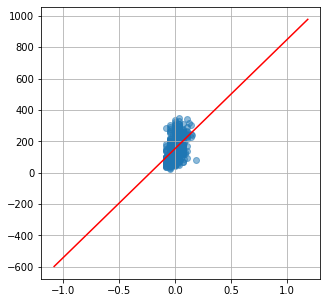

In [ ]:
def show_regline(X,y,w1,w0):
  x_min, x_max = X.min() - 1, X.max() + 1
  linex = np.linspace(x_min, x_max)
  liney = w1*linex+w0
  plt.figure(figsize=(5,5))
  plt.grid()
  plt.scatter(X,y, alpha=0.5)
  plt.plot(linex, liney, c='red')
  plt.show()
show_regline(X,y,w1,w0)

7120.963785085329


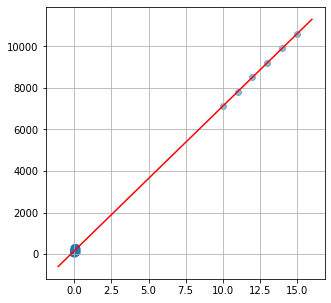

In [ ]:
def lin_reg(val,w0,w1):
  return w1*val + w0 #model
print(lin_reg(10, w0, w1))
X_new, y_new = X.copy(), y.copy()
for i in range(10,16):
  X_new = np.insert(X_new,-1, i)
  y_new = np.insert(y_new,-1, lin_reg(i,w0,w1))
show_regline(X_new, y_new, w1, w0)

In [ ]:
X_1 = np.arange(0, 13,1)
y_1 = X_1 - 2 * (X_1 ** 2) + 0.5 * (X_1 ** 3) + np.random.normal(-3, 3, 13)

In [ ]:
def show_regline(X,y,w1,w0):
  x_min, x_max = X.min() - 1, X.max() + 1
  linex = np.linspace(x_min, x_max)
  liney = w1*linex+w0
  plt.figure(figsize=(5,5))
  plt.grid()
  plt.scatter(X_1,y_1, s = 256, color='blue', alpha=0.5)
  plt.plot(linex, liney, c='red')
  plt.show()

In [ ]:
def linear_regressor(X,y):
  X = np.array(X)
  y = np.array(y)
  n = X.size
  w0 = (y.mean()*np.sum(X**2)-X.mean()*np.sum(X*y)) / (np.sum(X**2) - n*X.mean()**2)
  w1 = (np.sum(X*y) - X.mean()*np.sum(y)) / (np.sum(X**2) - n*X.mean()**2)
  return w0,w1
w0,w1 = linear_regressor(X,y)

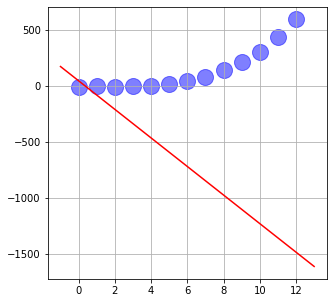

In [ ]:
w0_q,w1_q = linear_regressor(X_1, y_1)
show_regline(X_1,y_1,w0_q,w1_q)

##**References:**
[1] “7.1. Toy datasets — scikit-learn 0.24.2 documentation.” https://scikit-learn.org/stable/datasets/toy_dataset.html (accessed May 05, 2021).

[2] “numeth2021/NuMeth_4_5_Applied_Linear_Regression.ipynb at main · dyjdlopez/numeth2021 · GitHub.” https://github.com/dyjdlopez/numeth2021/blob/main/Week%209-13%20-%20Curve%20Fitting%20Techniques/NuMeth_4_5_Applied_Linear_Regression.ipynb (accessed May 05, 2021).

[3] “numeth2021/NuMeth_4_Curve_Fitting.ipynb at main · dyjdlopez/numeth2021 · GitHub.” https://github.com/dyjdlopez/numeth2021/blob/main/Week%209-13%20-%20Curve%20Fitting%20Techniques/NuMeth_4_Curve_Fitting.ipynb (accessed May 05, 2021). 

[4] “Implementing and Visualizing Linear Regression in Python with SciKit Learn | by Sthitaprajna Mishra | Becoming Human: Artificial Intelligence Magazine.” https://becominghuman.ai/implementing-and-visualizing-linear-regression-in-python-with-scikit-learn-a073768dc688 (accessed May 05, 2021). 

[5] “Implementation of Simple Linear Regression Using Normal Equation(Matrices) | by Pratik Shukla | Medium.” https://medium.com/@shuklapratik22/implementation-of-simple-linear-regression-using-normal-equation-matrices-f9021c3590da (accessed May 05, 2021).
